A notebook used to plot the overall spectra for the various fo2 and compostions.

In [1]:
#Import modules
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..")
#%matplotlib notebook #uncomment this for interactive plotting


In [2]:

#################################### FUNCTIONS ####################################

def read_and_plot(ax,
                  path,
                  label="",
                  width=1,
                  style="-",
                  color="blue",
                  alpha=0.6,
                  rebin=0
                  ):
    """A plotting function taken from helios to read and plot the spectral data
    Inputs:
        ax = axis which the data is plotted on
        path = the directory file path of the flux data files
        label = the name you wish to attach to the plot on the legend
        width = width of the lines in the plot
        style = linestyle used in the plot
        color = color of the lines
        alpha = transparency of the color of the lines
        rebin = Resolution which the spectrum is rebinned to"""
    if 'flux_ratio' in path:
        data = np.loadtxt(path)
        lamda, spec = data[:,0], data[:,1]*1e6#*((1*6371000)/(0.681*696000000))**2
    else:
        lamda, spec = tls.read_helios_spectrum(path, type='emission')

    if rebin > 0:
        lamda, spec = tls.rebin_spectrum_to_resolution(lamda, spec, resolution=rebin, w_unit='micron')

    line, = ax.plot(lamda, spec, color=color,linewidth=width, linestyle=style, label=label, alpha=alpha)

    return line




In [3]:

#################################### FUNCTIONS ####################################

def read_and_diff_plot(ax,
                  path1,
                  path2,
                  label="",
                  width=1,
                  style="-",
                  color="blue",
                  alpha=0.6,
                  rebin=0
                  ):
    """A function ive adapted from Helios, it takes two spectral plots and will plot the difference between plots.
    Inputs:
        ax = axis which the data is plotted on
        path1 = the directory file path of the primary flux data files
        path2 = the directory file path of the secondary flux data files
        label = the name you wish to attach to the plot on the legend
        width = width of the lines in the plot
        style = linestyle used in the plot
        color = color of the lines
        alpha = transparency of the color of the lines
        rebin ="""
    if 'flux_ratio' in path1:
        data1 = np.loadtxt(path1)
        lamda1, spec1 = data1[:,0], data1[:,1]*1e6
    else:
        lamda, spec = tls.read_helios_spectrum(path, type='emission')
    if 'flux_ratio' in path2:
        data2= np.loadtxt(path2)
        lamda2, spec2 = data2[:,0], data2[:,1]*1e6
    else:
        lamda, spec = tls.read_helios_spectrum(path, type='emission')

    if rebin > 0:
        lamda, spec = tls.rebin_spectrum_to_resolution(lamda, spec, resolution=rebin, w_unit='micron')

    line, = ax.plot(lamda1, spec1-spec2, color=color,linewidth=width, linestyle=style, label=label, alpha=alpha)

    return line




Mercury spectra

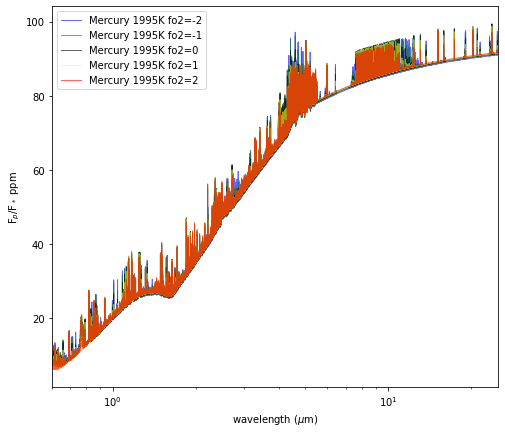

In [4]:
#Plot the mercury spectra
fig, ax = plt.subplots(figsize=(8,7)) # Create figure

#Plot the spectra
read_and_plot(ax, "Mercury_1995_fo2_-2_flux_ratio.dat",label='Mercury 1995K fo2=-2',color='blue')
read_and_plot(ax, "Mercury_1995_fo2_-1_flux_ratio.dat",label='Mercury 1995K fo2=-1',color='green')
read_and_plot(ax, "Mercury_1995_fo2_0_flux_ratio.dat",label='Mercury 1995K fo2=0',color='black')
read_and_plot(ax, "Mercury_1995_fo2_1_flux_ratio.dat",label='Mercury 1995K fo2=1',color='yellow')
read_and_plot(ax, "Mercury_1995_fo2_2_flux_ratio.dat",label='Mercury 1995K fo2=2',color='red')

#Modify the axis of the plot and add a legend
ax.set(xlim=[0.6, 25], xlabel='wavelength ($\mu$m)', ylabel='F$_p$/F$_*$ ppm')
ax.set_xscale('log')
ax.legend(loc='best', frameon=True)

#Save figure
plt.savefig("Mercury fo2 spectra.png")


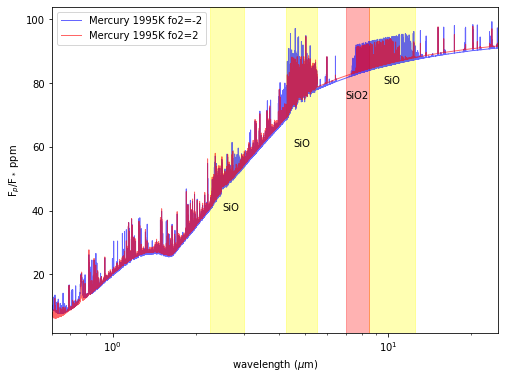

In [5]:
#Create mercury compostion spectra
fig, ax = plt.subplots(figsize=(8,6)) # Create figure

#Plot the extreme fo2 spectra
read_and_plot(ax, "Mercury_1995_fo2_-2_flux_ratio.dat",label='Mercury 1995K fo2=-2',color='blue')
read_and_plot(ax, "Mercury_1995_fo2_2_flux_ratio.dat",label='Mercury 1995K fo2=2',color='red')

#Customise the axis
ax.set(xlim=[0.6, 25], xlabel='wavelength ($\mu$m)', ylabel='F$_p$/F$_*$ ppm')
ax.set_xscale('log')

#Add spectral regions
ax.axvspan(4.25,5.5,color='yellow',alpha=0.3)
ax.axvspan(2.25,3,color='yellow',alpha=0.3)
ax.axvspan(8.5,12.5,color='yellow',alpha=0.3)
ax.axvspan(7,8.5,color='red',alpha=0.3)
ax.annotate('SiO', (9.6,80))
ax.annotate('SiO2', (7,75))
ax.annotate('SiO', (4.5,60))
ax.annotate('SiO', (2.5,40))

#Add legend
ax.legend(loc='best', frameon=True)
#Aave figure
plt.savefig("Mercury fo2 extreme cases.png")


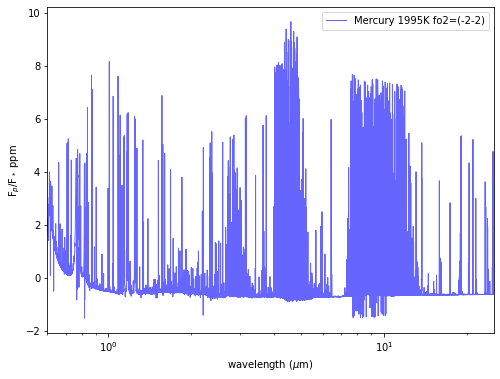

In [6]:
#Below is a difference plot of the fo2=pm2 case for merucry, it dosn't telll me much so ive not commented it
fig, ax = plt.subplots(figsize=(8,6))

read_and_diff_plot(ax, "Mercury_1995_fo2_-2_flux_ratio.dat","Mercury_1995_fo2_2_flux_ratio.dat",label='Mercury 1995K fo2=(-2-2)',color='blue')



ax.set(xlim=[0.6, 25], xlabel='wavelength ($\mu$m)', ylabel='F$_p$/F$_*$ ppm')
ax.set_xscale('log')


ax.legend(loc='best', frameon=True)




BSE

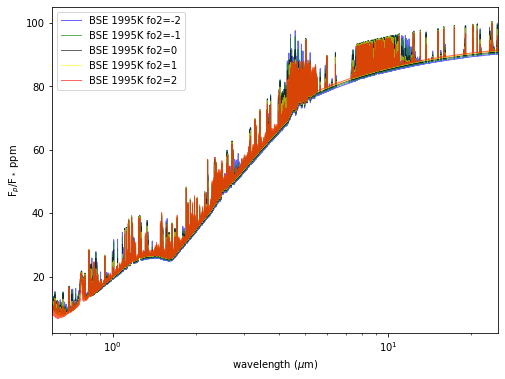

In [23]:
#Create figure
fig, ax = plt.subplots(figsize=(8,6))

#Plot the spectra for BSE
read_and_plot(ax, "BSE_1995_fo2_-2_flux_ratio.dat",label='BSE 1995K fo2=-2',color='blue')
read_and_plot(ax, "BSE_1995_fo2_-1_flux_ratio.dat",label='BSE 1995K fo2=-1',color='green')
read_and_plot(ax, "BSE_1995_fo2_0_flux_ratio.dat",label='BSE 1995K fo2=0',color='black')
read_and_plot(ax, "BSE_1995_fo2_1_flux_ratio.dat",label='BSE 1995K fo2=1',color='yellow')
read_and_plot(ax, "BSE_1995_fo2_2_flux_ratio.dat",label='BSE 1995K fo2=2',color='red')

#Customise axies
ax.set(xlim=[0.6, 25], xlabel='wavelength ($\mu$m)', ylabel='F$_p$/F$_*$ ppm')
ax.set_xscale('log')

#Add legend
ax.legend(loc='best', frameon=True)

#Uncomment below to save figure
#plt.savefig("output_plots/Mercury/spectrum_fo2=2.png")

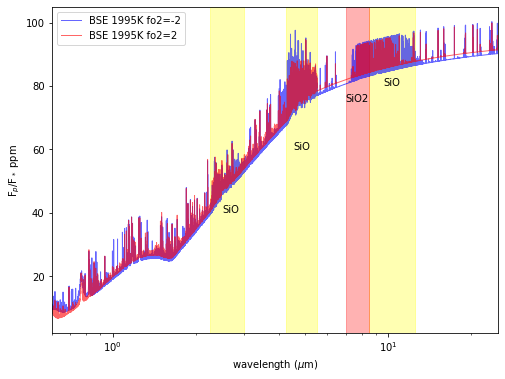

In [24]:
#Create figure
fig, ax = plt.subplots(figsize=(8,6))

#Plot the extreme cases for BSE compostion 
read_and_plot(ax, "BSE_1995_fo2_-2_flux_ratio.dat",label='BSE 1995K fo2=-2',color='blue')
read_and_plot(ax, "BSE_1995_fo2_2_flux_ratio.dat",label='BSE 1995K fo2=2',color='red')

#Customise axis
ax.set(xlim=[0.6, 25], xlabel='wavelength ($\mu$m)', ylabel='F$_p$/F$_*$ ppm')
ax.set_xscale('log')

#Add spectral regions
ax.axvspan(4.25,5.5,color='yellow',alpha=0.3)
ax.axvspan(2.25,3,color='yellow',alpha=0.3)
ax.axvspan(8.5,12.5,color='yellow',alpha=0.3)
ax.axvspan(7,8.5,color='red',alpha=0.3)
ax.annotate('SiO', (9.6,80))
ax.annotate('SiO2', (7,75))
ax.annotate('SiO', (4.5,60))
ax.annotate('SiO', (2.5,40))

#Add legend
ax.legend(loc='best', frameon=True)

#Uncomment below to save figure
#plt.savefig("output_plots/Mercury/spectrum_fo2=2.png")

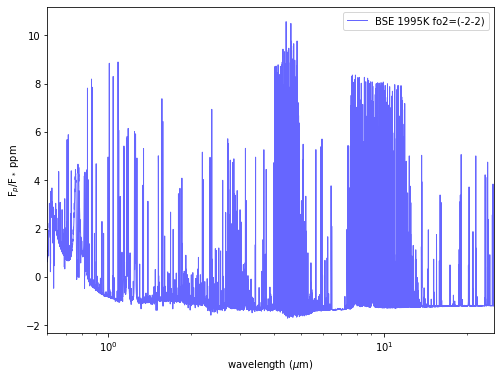

In [25]:
# use the below to plot BSE differnce plots
fig, ax = plt.subplots(figsize=(8,6))


read_and_diff_plot(ax, "BSE_1995_fo2_-2_flux_ratio.dat","BSE_1995_fo2_2_flux_ratio.dat",label='BSE 1995K fo2=(-2-2)',color='blue')



ax.set(xlim=[0.6, 25], xlabel='wavelength ($\mu$m)', ylabel='F$_p$/F$_*$ ppm')
ax.set_xscale('log')


ax.legend(loc='best', frameon=True)

#plt.savefig("output_plots/Mercury/spectrum_fo2=2.png")


Basalt

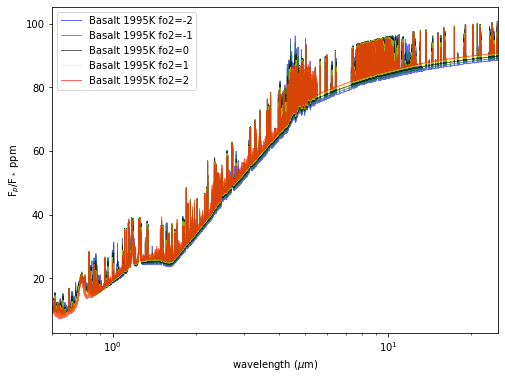

In [26]:
#Create figure
fig, ax = plt.subplots(figsize=(8,6))

#Plot the Basalt spectra
read_and_plot(ax, "Basalt_1995_fo2_-2_flux_ratio.dat",label='Basalt 1995K fo2=-2',color='blue')
read_and_plot(ax, "Basalt_1995_fo2_-1_flux_ratio.dat",label='Basalt 1995K fo2=-1',color='green')
read_and_plot(ax, "Basalt_1995_fo2_0_flux_ratio.dat",label='Basalt 1995K fo2=0',color='black')
read_and_plot(ax, "Basalt_1995_fo2_1_flux_ratio.dat",label='Basalt 1995K fo2=1',color='yellow')
read_and_plot(ax, "Basalt_1995_fo2_2_flux_ratio.dat",label='Basalt 1995K fo2=2',color='red')

#Customise legend
ax.set(xlim=[0.6, 25], xlabel='wavelength ($\mu$m)', ylabel='F$_p$/F$_*$ ppm')
ax.set_xscale('log')

#Add legend
ax.legend(loc='best', frameon=True)

#Uncomment below to save figure
#plt.savefig("output_plots/Mercury/spectrum_fo2=2.png")

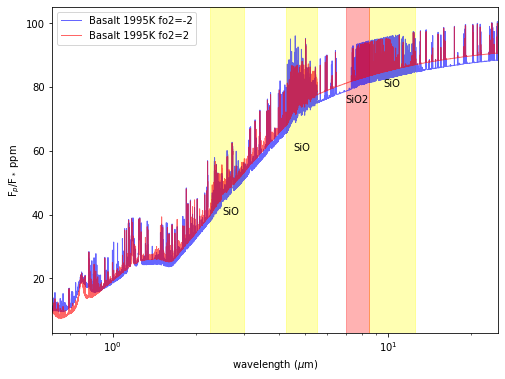

In [19]:
#Create figure
fig, ax = plt.subplots(figsize=(8,6))

#Plot the extreme basalt spectra
read_and_plot(ax, "Basalt_1995_fo2_-2_flux_ratio.dat",label='Basalt 1995K fo2=-2',color='blue')
read_and_plot(ax, "Basalt_1995_fo2_2_flux_ratio.dat",label='Basalt 1995K fo2=2',color='red')

#Customise the axis
ax.set(xlim=[0.6, 25], xlabel='wavelength ($\mu$m)', ylabel='F$_p$/F$_*$ ppm')
ax.set_xscale('log')

#Add spectral regions
ax.axvspan(4.25,5.5,color='yellow',alpha=0.3)
ax.axvspan(2.25,3,color='yellow',alpha=0.3)
ax.axvspan(8.5,12.5,color='yellow',alpha=0.3)
ax.axvspan(7,8.5,color='red',alpha=0.3)
ax.annotate('SiO', (9.6,80))
ax.annotate('SiO2', (7,75))
ax.annotate('SiO', (4.5,60))
ax.annotate('SiO', (2.5,40))

#Add legend
ax.legend(loc='best', frameon=True)

#Uncomment below to save figure
#plt.savefig("output_plots/Mercury/spectrum_fo2=2.png")

Komatiite

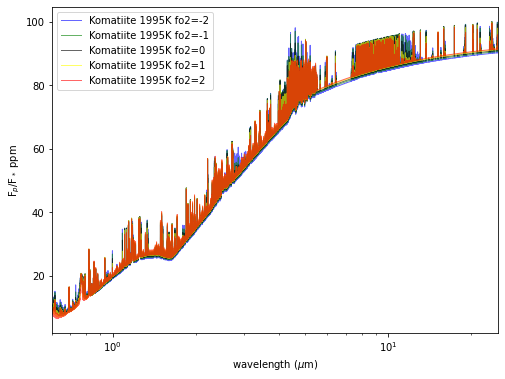

In [27]:
#Create figure
fig, ax = plt.subplots(figsize=(8,6))

#Create the komatiite spectra
read_and_plot(ax, "Komatiite_1995_fo2_-2_flux_ratio.dat",label='Komatiite 1995K fo2=-2',color='blue')
read_and_plot(ax, "Komatiite_1995_fo2_-1_flux_ratio.dat",label='Komatiite 1995K fo2=-1',color='green')
read_and_plot(ax, "Komatiite_1995_fo2_0_flux_ratio.dat",label='Komatiite 1995K fo2=0',color='black')
read_and_plot(ax, "Komatiite_1995_fo2_1_flux_ratio.dat",label='Komatiite 1995K fo2=1',color='yellow')
read_and_plot(ax, "Komatiite_1995_fo2_2_flux_ratio.dat",label='Komatiite 1995K fo2=2',color='red')

#Customise axis
ax.set(xlim=[0.6, 25], xlabel='wavelength ($\mu$m)', ylabel='F$_p$/F$_*$ ppm')
ax.set_xscale('log')

#Add legend
ax.legend(loc='best', frameon=True)

#Uncomment below to save figure
#plt.savefig("output_plots/Mercury/spectrum_fo2=2.png")

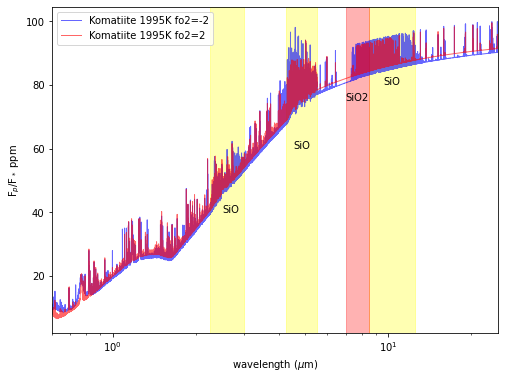

In [29]:
#Create figure
fig, ax = plt.subplots(figsize=(8,6))

#Plot the extreme spectra for Komatiite
read_and_plot(ax, "Komatiite_1995_fo2_-2_flux_ratio.dat",label='Komatiite 1995K fo2=-2',color='blue')
read_and_plot(ax, "Komatiite_1995_fo2_2_flux_ratio.dat",label='Komatiite 1995K fo2=2',color='red')

#Customise the axis
ax.set(xlim=[0.6, 25], xlabel='wavelength ($\mu$m)', ylabel='F$_p$/F$_*$ ppm')
ax.set_xscale('log')

#Add spectral regions
ax.axvspan(4.25,5.5,color='yellow',alpha=0.3)
ax.axvspan(2.25,3,color='yellow',alpha=0.3)
ax.axvspan(8.5,12.5,color='yellow',alpha=0.3)
ax.axvspan(7,8.5,color='red',alpha=0.3)
ax.annotate('SiO', (9.6,80))
ax.annotate('SiO2', (7,75))
ax.annotate('SiO', (4.5,60))
ax.annotate('SiO', (2.5,40))

#Add legend
ax.legend(loc='best', frameon=True)

#Uncomment below to save figure
#plt.savefig("output_plots/Mercury/spectrum_fo2=2.png")

Constant fo2 and varying the various compostions

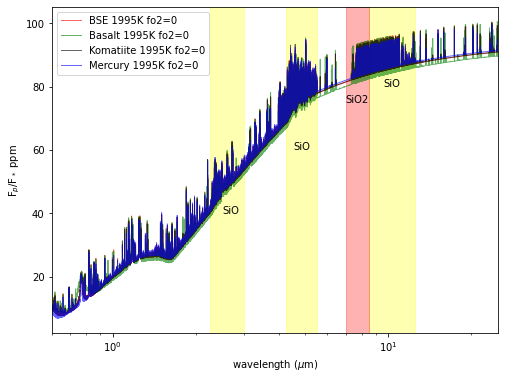

In [30]:
#Create figure
fig, ax = plt.subplots(figsize=(8,6))

#Plot the compostions for fo2=0
read_and_plot(ax, "BSE_1995_fo2_0_flux_ratio.dat",label='BSE 1995K fo2=0',color='red')
read_and_plot(ax, "Basalt_1995_fo2_0_flux_ratio.dat",label='Basalt 1995K fo2=0',color='green')
read_and_plot(ax, "Komatiite_1995_fo2_0_flux_ratio.dat",label='Komatiite 1995K fo2=0',color='black')
read_and_plot(ax, "Mercury_1995_fo2_0_flux_ratio.dat",label='Mercury 1995K fo2=0',color='blue')

#Customise the axis
ax.set(xlim=[0.6,25], xlabel='wavelength ($\mu$m)', ylabel='F$_p$/F$_*$ ppm')
ax.set_xscale('log')

#Add spectral regions
ax.axvspan(4.25,5.5,color='yellow',alpha=0.3)
ax.axvspan(2.25,3,color='yellow',alpha=0.3)
ax.axvspan(8.5,12.5,color='yellow',alpha=0.3)
ax.axvspan(7,8.5,color='red',alpha=0.3)
ax.annotate('SiO', (9.6,80))
ax.annotate('SiO2', (7,75))
ax.annotate('SiO', (4.5,60))
ax.annotate('SiO', (2.5,40))

#Add legend
ax.legend(loc='best', frameon=True)

#Save figure
plt.savefig("Spectra for compostions based on fo2=0.png")

Compostion spectra for a 6 to 12 microns

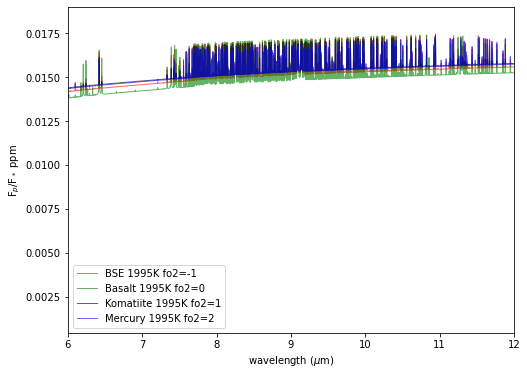

In [18]:
#Create figure
fig, ax = plt.subplots(figsize=(8,6))

#Plot the spectra for each compostion
read_and_plot(ax, "BSE_1995_fo2_-2_flux_ratio.dat",label='BSE 1995K fo2=-1',color='red')
read_and_plot(ax, "Basalt_1995_fo2_-2_flux_ratio.dat",label='Basalt 1995K fo2=0',color='green')
read_and_plot(ax, "Komatiite_1995_fo2_1_flux_ratio.dat",label='Komatiite 1995K fo2=1',color='black')
read_and_plot(ax, "Mercury_1995_fo2_-2_flux_ratio.dat",label='Mercury 1995K fo2=2',color='blue')

#Customise axis
ax.set(xlim=[6,12], xlabel='wavelength ($\mu$m)', ylabel='F$_p$/F$_*$ ppm')

#Add legend
ax.legend(loc='best', frameon=True)

#uncomment below to save plot
#plt.savefig("output_plots/Mercury/spectrum_fo2=2.png")